# AirBnb Listings

##### Step 1 - Import necessary libraries

In [1]:
#First we need to import the libraries we will be using for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

#### Step 2 - Import data and create a pandas dataframe

In [2]:
listings = pd.read_csv(r'data/listings.csv')

### PREPROCESS

#### Step 3 - Get general information of the dataset

In [3]:
# Get information about the data to see how many rows and columns we have and what the data types are
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37541 non-null  int64  
 1   name                            37539 non-null  object 
 2   host_id                         37541 non-null  int64  
 3   host_name                       37536 non-null  object 
 4   neighbourhood_group             37541 non-null  object 
 5   neighbourhood                   37541 non-null  object 
 6   latitude                        37541 non-null  float64
 7   longitude                       37541 non-null  float64
 8   room_type                       37541 non-null  object 
 9   price                           22790 non-null  float64
 10  minimum_nights                  37541 non-null  int64  
 11  number_of_reviews               37541 non-null  int64  
 12  last_review                     

In [4]:
# Display the first 5 rows of the data to see what it looks like
listings.head().T

,0,1,2,3,4
id,1189243425411300671,651593916026998398,310325,572612125615500056,1020282701018874374
name,The Grand III,Cheerful one bedroom townhouse with backyard,Large Sunny Bedroom with Bay Window,Room by Sunny & Bay! Sunset Park & Bay Ridge,Trendy Private Bedroom
host_id,61391963,136812643,745069,358089614,483056418
host_name,Stay With Vibe,Marah,Kimberly,Joshua,Kristina
neighbourhood_group,Manhattan,Brooklyn,Manhattan,Brooklyn,Brooklyn
neighbourhood,Murray Hill,Flatlands,Harlem,Sunset Park,Bedford-Stuyvesant
latitude,40.750251,40.62476,40.82359,40.63952,40.678946
longitude,-73.977745,-73.93556,-73.94601,-74.01484,-73.943759
room_type,Entire home/apt,Private room,Private room,Private room,Private room
price,58.0,80.0,75.0,45.0,47.0


In [5]:
# Check for missing values in the data as a percentage of the total number of rows
listings.isnull().sum() / listings.shape[0] * 100

id                                 0.000000
name                               0.005328
host_id                            0.000000
host_name                          0.013319
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                             39.293040
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       30.739725
reviews_per_month                 30.739725
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           85.772888
dtype: float64

#### Step 4 - Handling missing data

After observing the missing values in the data, we see that two columns have a low percentage of missing values. We can drop these rows without losing much information but we'll check information of those rows first to make sure we're not losing any important information.

In [9]:
# Check the rows where the name or host_name is missing
listings[listings['name'].isnull() | listings['host_name'].isnull()].T

,6785,9449,17661,19325,19628,22232,27763
id,6360224,21044649,10116081,4446862,4763327,7556587,6992973
name,"Sunny, Private room in Bushwick",NaN,NaN,Charming Room in Prospect Heights!,"Luxurious, best location, spa inc'l",Sunny Room in Harlem,1 Bedroom in Prime Williamsburg
host_id,33134899,151547086,51913270,23077718,24576978,39608626,5162530
host_name,NaN,Tanya,Andrew,NaN,NaN,NaN,NaN
neighbourhood_group,Brooklyn,Bronx,Manhattan,Brooklyn,Brooklyn,Manhattan,Brooklyn
neighbourhood,Bushwick,Norwood,Midtown,Crown Heights,Greenpoint,Harlem,Williamsburg
latitude,40.69977,40.87553,40.75939,40.67605,40.72119,40.82992,40.71944
longitude,-73.92912,-73.88601,-73.96949,-73.95997,-73.95279,-73.94033,-73.95645
room_type,Private room,Private room,Entire home/apt,Private room,Entire home/apt,Private room,Entire home/apt
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the rows with missing values have no relevant information, we can drop them.

In [10]:
# Drop the rows where the name or host_name is missing
listings.dropna(subset=['name', 'host_name'], inplace=True)

The column "reviews_per_month" depends on the column "number_of_reviews" (and the dates of said reviews, found in another dataset). We can see that whenever "number_of_reviews" has a value of 0, "reviews_per_month" has a null value. We will replace those null values with 0.

In [35]:
# We can confirm this, as the amount of rows in the number_of_reviews column with a value of 0 is 11535, the same as the amount of rows with a null value in the reviews_per_month column.
listings[listings['number_of_reviews'] == 0].shape[0]

11535

The column "last_review" contains a date, if there were no reviews for the listing, that date will not exist. For our purposes, this column is irrelevant and therefore will be dropped. And for the "license" column, since it's missing over 80% of the data, we will drop it too.

In [37]:
# Drop the "last_review" and "license" columns as they have a lot of missing values.
listings.drop(columns=['last_review', 'license'], axis=1, inplace=True)

In [38]:
# Fill the nan values in the reviews_per_month column with 0.
listings['reviews_per_month'].fillna(0, inplace=True)

We have successfully removed almost all the missing values from the data. The only column we need to deal with is the price column, which requires more specific cleaning.

In [40]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37534 entries, 0 to 37540
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37534 non-null  int64  
 1   name                            37534 non-null  object 
 2   host_id                         37534 non-null  int64  
 3   host_name                       37534 non-null  object 
 4   neighbourhood_group             37534 non-null  object 
 5   neighbourhood                   37534 non-null  object 
 6   latitude                        37534 non-null  float64
 7   longitude                       37534 non-null  float64
 8   room_type                       37534 non-null  object 
 9   price                           22790 non-null  float64
 10  minimum_nights                  37534 non-null  int64  
 11  number_of_reviews               37534 non-null  int64  
 12  reviews_per_month               37534

In [41]:
listings.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             14744
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

#### Handling the missing values in the 'price' column

In [52]:
# First, we will check how the price column is distributed.
listings['price'].describe().round(2)

count     22790.00
mean        232.89
std        1019.74
min           8.00
25%          85.00
50%         147.00
75%         250.00
max      100000.00
Name: price, dtype: float64

In [51]:
# First we will examine how many unique values there are in the neighbourhood and room_type column.
rooms = len(listings.room_type.unique())
neighbourhoods = len(listings.neighbourhood.unique())
unique_rooms = listings.room_type.unique()
print(f'There are {rooms} unique values in the room_type column and {neighbourhoods} unique values in the neighbourhood column.')
print(f'The unique values in the room_type column are: {unique_rooms}')


There are 4 unique values in the room_type column and 225 unique values in the neighbourhood column.
The unique values in the room_type column are: ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


For the null values in the price column, we will find the mean price for each room type and neighbourhood and fill the null values with the mean price for that room type and neighbourhood. This approach is rooted in the principle of comparable analysis, which is commonly used in real estate and rental markets. There are other dynamic factors like seasonality and occupancy trends that could affect the price, but we will not consider them in this analysis.

In [54]:
#We will create a groupby object to check the average price per neighbourhood and room type.
listings.groupby(['neighbourhood', 'room_type'])['price'].mean().sort_values(ascending=False)

neighbourhood       room_type      
SoHo                Private room       2661.807692
Riverdale           Entire home/apt    2000.000000
Williamsburg        Hotel room          999.000000
Washington Heights  Hotel room          965.666667
Manhattan Beach     Shared room         899.000000
                                          ...     
Theater District    Shared room                NaN
West Farms          Private room               NaN
                    Shared room                NaN
West Village        Hotel room                 NaN
                    Shared room                NaN
Name: price, Length: 542, dtype: float64

In [55]:
# Using these results, we will fill the Nan values in the price column with the average price for the neighbourhood and room type.
listings['price'] = listings['price'].fillna(listings.groupby(['neighbourhood', 'room_type'])['price'].transform('mean'))

In [56]:
# We will check the distribution of the price column again to see what the impact of filling the Nan values with the average price is.
listings['price'].describe().round(2)

count     37459.00
mean        232.02
std         801.69
min           8.00
25%          98.00
50%         169.00
75%         288.94
max      100000.00
Name: price, dtype: float64

In [57]:
# As we can see, the Nan values have been reduced from 14744 to 75.
listings.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             75
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

In [78]:
# Let's check how many listings there are per neighbourhood group that have a price of nan
listings[listings['price'].isnull()]['neighbourhood'].value_counts()

neighbourhood
West Village                 12
SoHo                          9
Long Island City              7
Bay Ridge                     4
Kips Bay                      4
Greenwich Village             3
Holliswood                    3
West Farms                    2
Emerson Hill                  2
Forest Hills                  2
Bensonhurst                   2
Ozone Park                    2
Fort Hamilton                 2
Hunts Point                   1
Highbridge                    1
Concourse Village             1
Red Hook                      1
Nolita                        1
Clinton Hill                  1
Park Slope                    1
Prospect-Lefferts Gardens     1
Roosevelt Island              1
Theater District              1
Bay Terrace                   1
Morrisania                    1
Boerum Hill                   1
St. Albans                    1
Port Richmond                 1
New Dorp                      1
Gravesend                     1
Fresh Meadows             

Since there are only 75 listings with a null value for price (this represents roughly 0.2% of the data) and most neighbourhoods have only 1 or 2 listings with missing values (with a few exceptions), we will drop these rows. 

In [80]:
# Let's drop the rows where the price is missing
listings.dropna(subset=['price'], inplace=True)

In [81]:
listings.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [84]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37459 entries, 0 to 37540
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37459 non-null  int64  
 1   name                            37459 non-null  object 
 2   host_id                         37459 non-null  int64  
 3   host_name                       37459 non-null  object 
 4   neighbourhood_group             37459 non-null  object 
 5   neighbourhood                   37459 non-null  object 
 6   latitude                        37459 non-null  float64
 7   longitude                       37459 non-null  float64
 8   room_type                       37459 non-null  object 
 9   price                           37459 non-null  float64
 10  minimum_nights                  37459 non-null  int64  
 11  number_of_reviews               37459 non-null  int64  
 12  reviews_per_month               37459

#### Step 5 - Checking the distribution of the numerical data

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

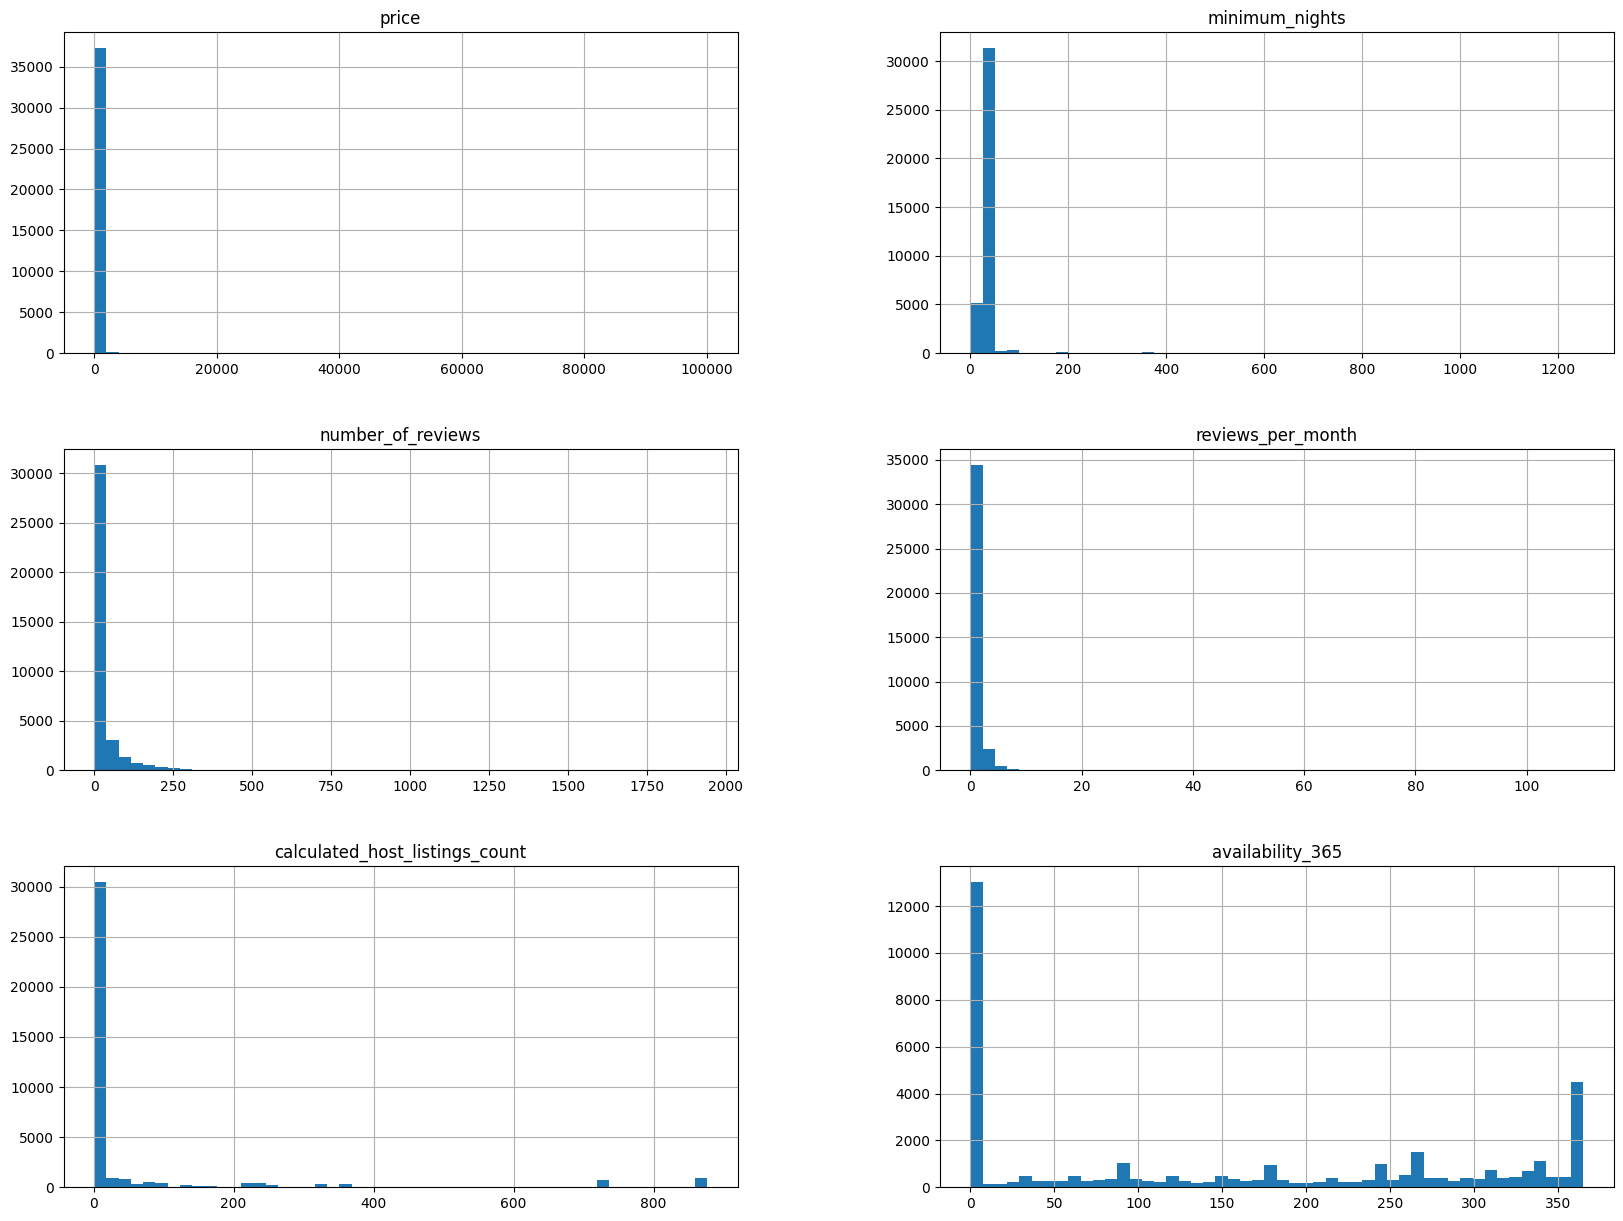

In [86]:
# We will check the distribution of the numerical data with a histogram of the price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365 columns
listings[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].hist(bins=50, figsize=(20,15))

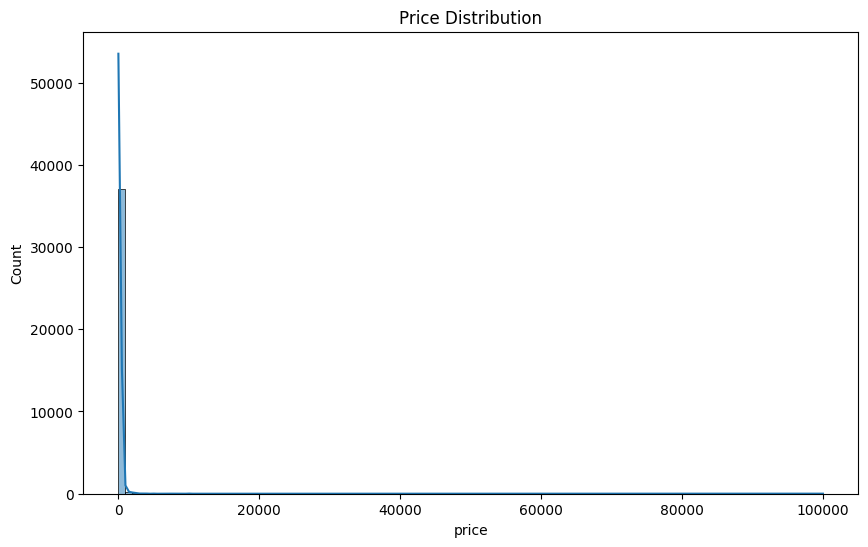

In [90]:
# Let's aisolate the price column and plot a histogram to see the distribution of the prices.
plt.figure(figsize=(10,6))
sns.histplot(listings['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.show()

In [92]:
# We can check the distribution of the price column with the new values we filled in.
listings['price'].describe().round(2)

count     37459.00
mean        232.02
std         801.69
min           8.00
25%          98.00
50%         169.00
75%         288.94
max      100000.00
Name: price, dtype: float64

The average price is 232 but the maximum price is 100000. This is a very high price for an Airbnb listing. We will check the rows where the price is higher than 1000.

In [96]:
# Let's check the number of listings where the price is higher than 500
listings[listings['price'] > 500].shape[0]

1847

As we can see,there are only 1847 listings where the price is higher than 500, this represents 4.93% of the total listings. We can divide the listings into two groups, one with a price lower than 500 and one with a price higher than 500.

In [108]:
# Let's create the two dataframes, one with the listings where the price is less than or equal to 500 and one with the listings where the price is higher than 500.
lower_price_listings = listings[listings['price'] <= 500]
high_price_listings = listings[listings['price'] > 500]

In [115]:
lower_price_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35612 entries, 0 to 37540
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35612 non-null  int64  
 1   name                            35612 non-null  object 
 2   host_id                         35612 non-null  int64  
 3   host_name                       35612 non-null  object 
 4   neighbourhood_group             35612 non-null  object 
 5   neighbourhood                   35612 non-null  object 
 6   latitude                        35612 non-null  float64
 7   longitude                       35612 non-null  float64
 8   room_type                       35612 non-null  object 
 9   price                           35612 non-null  float64
 10  minimum_nights                  35612 non-null  int64  
 11  number_of_reviews               35612 non-null  int64  
 12  reviews_per_month               35612

In [116]:
# Export the lower_price_listings data to a new csv file to use in Power BI for further analysis.
lower_price_listings.to_csv('data/lower_price_listings.csv', index=False)


### EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
listings = pd.read_csv(r'data/lower_price_listings.csv')

#### Step 6 - Checking correlation, distributions, outliers, etc.

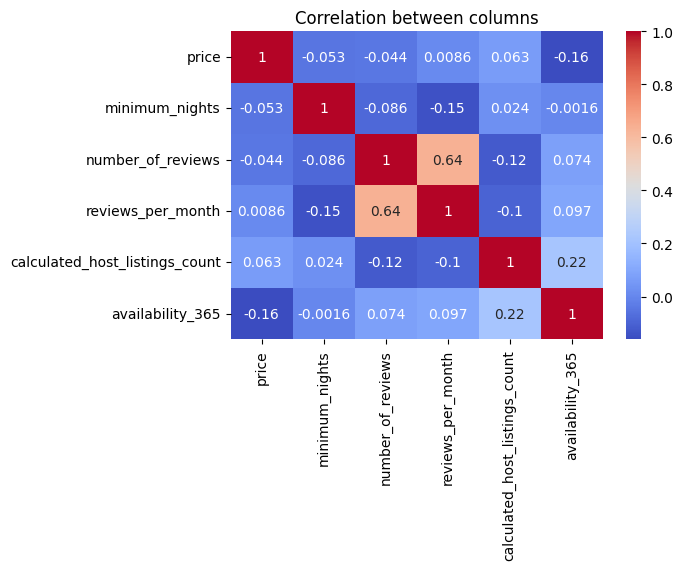

In [127]:
# Now let's check the correlation between the columns 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365' and create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(lower_price_listings[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between columns')
plt.show()


As we can see, there is no relevant correlation between the columns. The highest correlation is between the number_of_reviews and reviews_per_month columns, which is to be expected by the nature of the data.

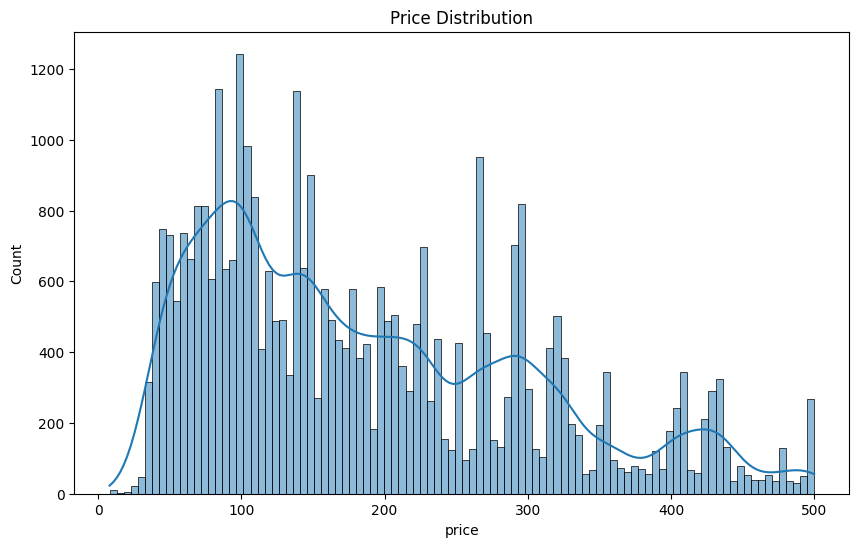

In [128]:
# Now that've removed the prices higher than 500, we can check the distribution of the price column again.
plt.figure(figsize=(10,6))
sns.histplot(lower_price_listings['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.show()

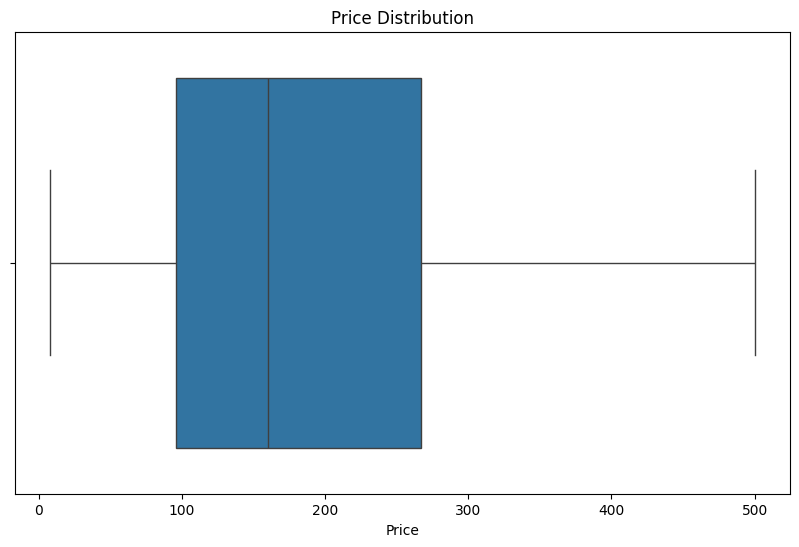

In [130]:
# We can check for outliers in the price column by plotting a boxplot.
plt.figure(figsize=(10,6))
sns.boxplot(x=lower_price_listings['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

We see that there no outliers in the price column, so we can move on to the next step.

In [139]:
# Let's see the distribution of the price column per neighbourhood group.
lower_price_listings.groupby('neighbourhood_group')['price'].describe().sort_values(by='mean', ascending=False).round(2).T


neighbourhood_group,Manhattan,Brooklyn,Queens,Staten Island,Bronx
count,14989.00,13572.00,5497.00,354.00,1200.00
mean,236.97,168.94,120.73,116.64,110.20
std,123.33,94.53,74.34,68.93,69.18
min,8.00,10.00,25.00,33.00,25.00
25%,135.00,88.00,69.00,70.00,63.70
50%,213.67,150.00,99.00,100.00,88.00
75%,319.71,234.99,150.03,140.00,135.71
max,500.00,500.00,500.00,456.00,500.00


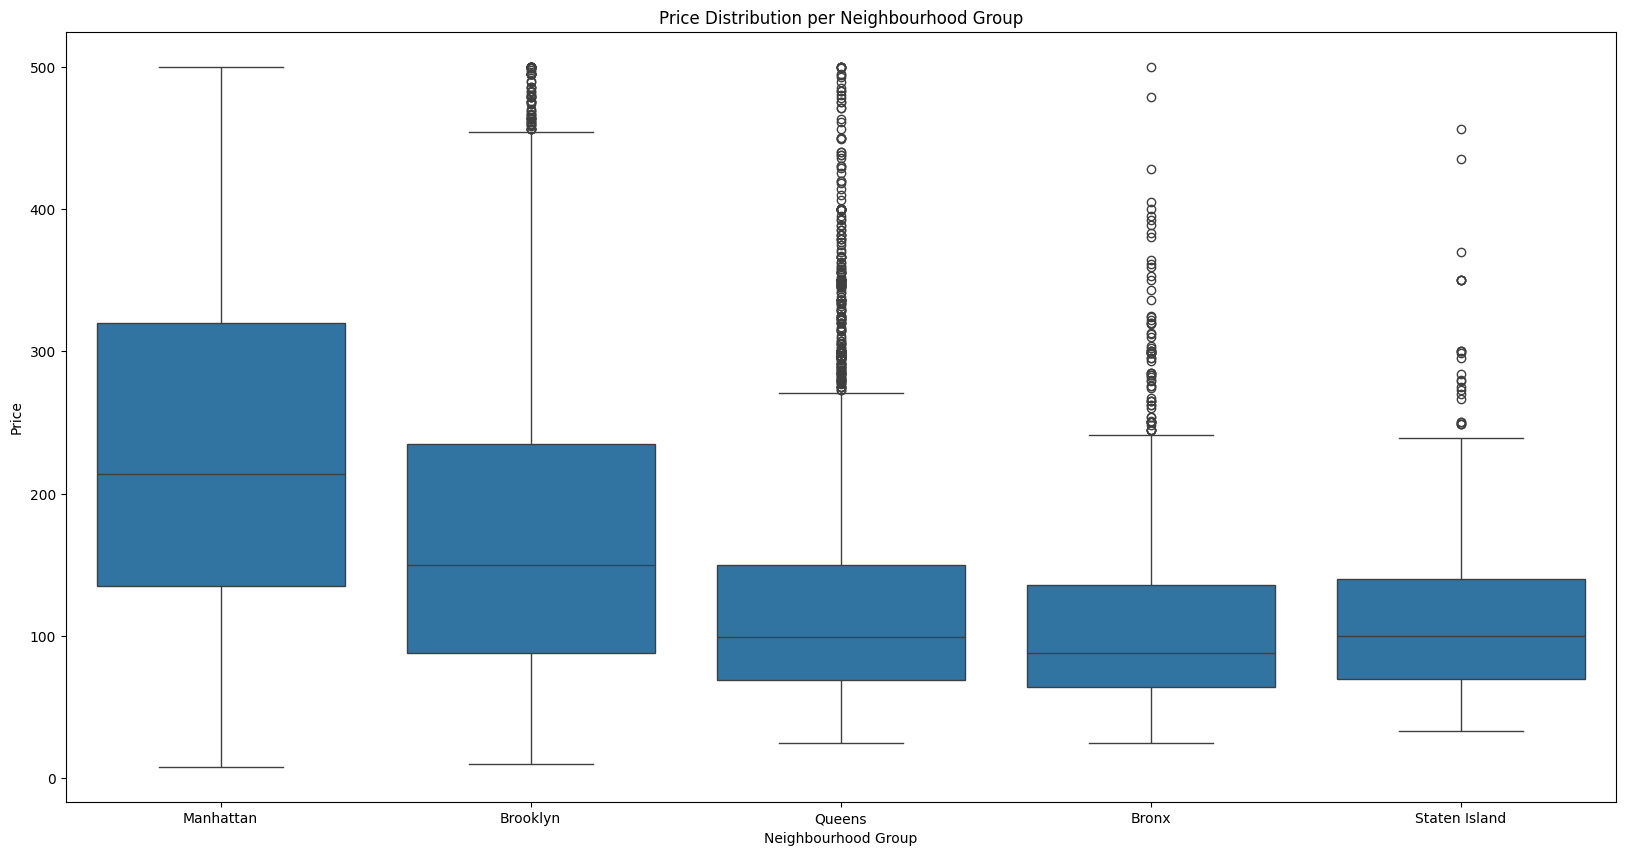

In [141]:
# Let's see how that looks in a boxplot.
plt.figure(figsize=(20,10))
sns.boxplot(x='neighbourhood_group', y='price', data=lower_price_listings)
plt.title('Price Distribution per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

We can see that there are some outliers in some neighbourhood groups, but we will keep them for now as they won't affect the analysis we will be doing later on.

#### Step 7 - Checking the high price listings

In [165]:
high_price_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 14 to 37407
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1847 non-null   int64  
 1   name                            1847 non-null   object 
 2   host_id                         1847 non-null   int64  
 3   host_name                       1847 non-null   object 
 4   neighbourhood_group             1847 non-null   object 
 5   neighbourhood                   1847 non-null   object 
 6   latitude                        1847 non-null   float64
 7   longitude                       1847 non-null   float64
 8   room_type                       1847 non-null   object 
 9   price                           1847 non-null   float64
 10  minimum_nights                  1847 non-null   int64  
 11  number_of_reviews               1847 non-null   int64  
 12  reviews_per_month               1847 

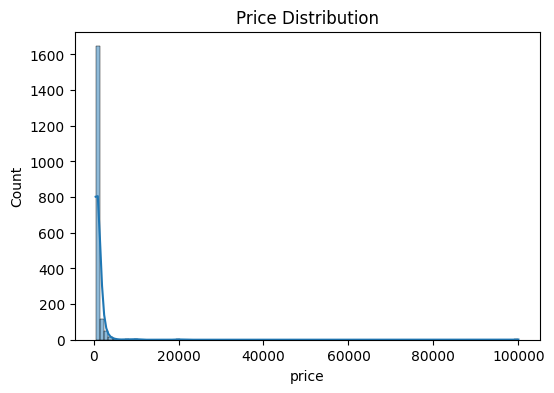

In [156]:
# Let's see the distribution of the price column in the high price listings
plt.figure(figsize=(6,4))
sns.histplot(high_price_listings['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.show()


The distribution of the price column in the high price listings is very skewed, so we will plot a boxplot to see the distribution of the prices.

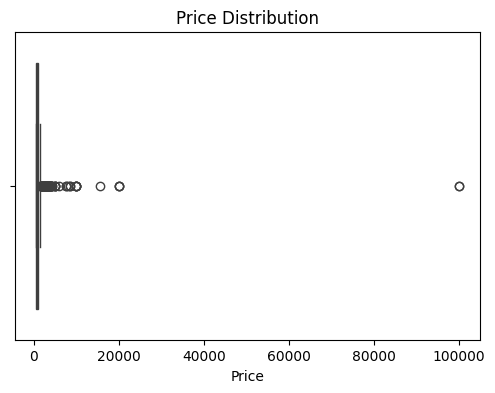

In [155]:
# We create a boxplot of the price column in the high price listings
plt.figure(figsize=(6,4))
sns.boxplot(x=high_price_listings['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


From this plot we can see that the majority of the high price listings have a price below 5000.

In [161]:
# How many listings in the high price listings have a price lower than 2000
high_price_listings[high_price_listings['price'] < 2000].shape[0]

1720

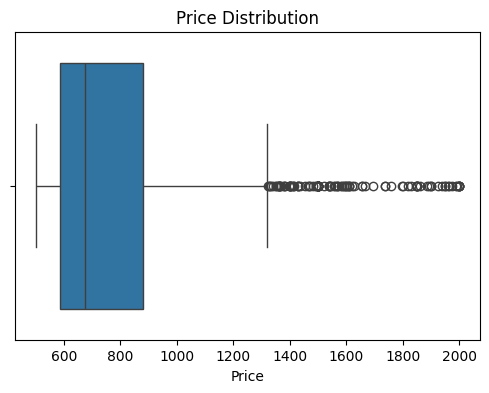

In [162]:
# We create a boxplot of the price column in the high price listings with a price lower than 2000
plt.figure(figsize=(6,4))
sns.boxplot(x=high_price_listings[high_price_listings['price'] < 2000]['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


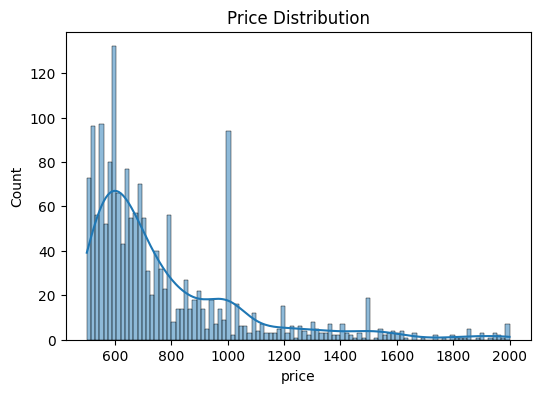

In [164]:
# create a histplot of the price column in the high price listings with a price lower than 2000
plt.figure(figsize=(6,4))
sns.histplot(high_price_listings[high_price_listings['price'] < 2000]['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.show()

Since the data we are not taking into account only represents 7% of the dataset, we will drop it. But out of curiosity, let's see the rows with the highest price.

In [167]:
# Let's check the rows with the highest price in the high price listings
high_price_listings[high_price_listings['price'] == high_price_listings['price'].max()].T

,8070,8856
id,17160286,605115521796576121
name,Clean and COZY Private room 3rdfl of a BROWNS...,Spacious ROOM on the 3fl of a Bedstuy Brownestone
host_id,110361431,110361431
host_name,Bobbi,Bobbi
neighbourhood_group,Brooklyn,Brooklyn
neighbourhood,Bedford-Stuyvesant,Bedford-Stuyvesant
latitude,40.69085,40.69254
longitude,-73.93806,-73.93636
room_type,Private room,Private room
price,100000.0,100000.0
